<h1><center> Wine Quality </center> </h1>

Referece : https://www.kaggle.com/yasserh/wine-quality-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from IPython.display import HTML
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, roc_curve, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Visualization settings
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize': (12,7),
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors=["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)
background_color='#fbfbfb'

In [3]:
# Read the input data file
df = pd.read_csv('WineQT.csv')

In [4]:
# Sample datafile
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# Shape of the data file
df.shape

(1143, 13)

In [6]:
# Summary of the data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


11 float fields. <br>
2 integer fields. <br>

There are no missing values in the dataset.

<h2> Feature Analysis </h2>

In [7]:
#Categorical feature analysis
def analyze_categorical_feature(fld,display_graph=True):
    print ("Sample data:\n")
    display(fld.head())
    df=pd.DataFrame({"Value": fld.value_counts().index,
                 "Count":fld.value_counts().values})
    print ("\nNull value count : ", fld.isnull().sum())
    unique_list=fld.unique().tolist()
    print ("\nUnique values: ", unique_list)
    print ("\n Unique values count: ", len(unique_list))
    print ("\nValue counts:\n",    df)
    if display_graph==True:
        plt.subplots(figsize=(25,10),facecolor=background_color)
        plt.subplot(2,2,1)
        plt.pie(fld.value_counts(),labels=fld.value_counts().index,autopct=lambda x: f'{x: .2f}%');
        plt.xticks(rotation=90)

        plt.subplot(2,2,2)   
        sns.barplot(data=df, x="Value",y="Count").set_facecolor(background_color);
        plt.xticks(rotation=90);
        plt.suptitle(fld.name + " -distribution");

        plt.show()
        plt.close()

In [8]:
#Continuous feature analysis
def analyze_continuous_feature(fld):
    print ("Sample data:\n",fld.head())
    print ("\nNull value count : ", fld.isnull().sum())
    print ("\n", fld.describe())
    print (f"\n Skewness : {fld.skew()} \n")
    plt.subplots(figsize=(25,10))
    plt.subplot(2,2,1)
    plt.hist(fld)
    plt.subplot(2,2,2)
    sns.boxplot(fld)
    plt.suptitle(fld.name + "-distribution")
    plt.show()
    plt.close()

## 1. fixed acidity

Sample data:
 0     7.4
1     7.8
2     7.8
3    11.2
4     7.4
Name: fixed acidity, dtype: float64

Null value count :  0

 count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

 Skewness : 1.0449299563724053 



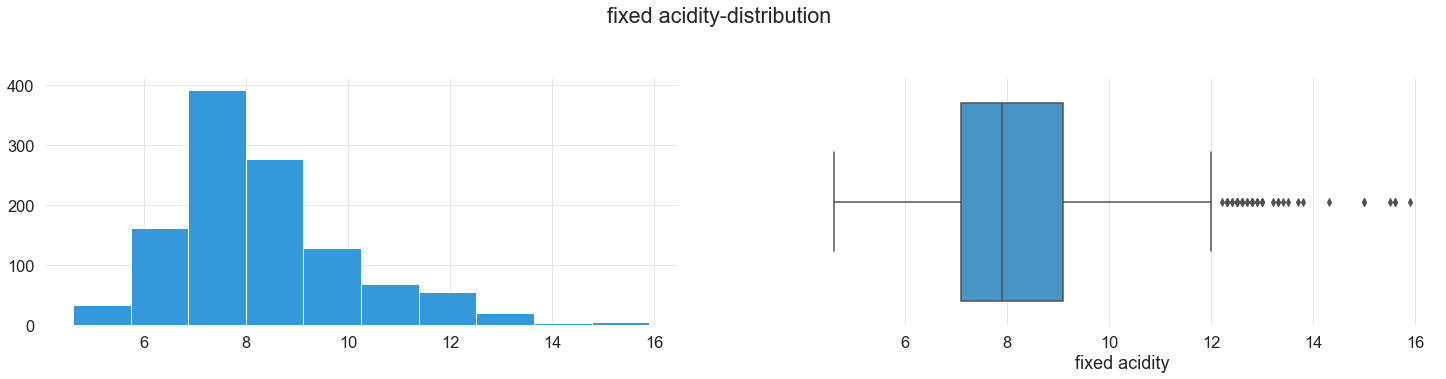

In [9]:
analyze_continuous_feature (df['fixed acidity'])

## 2. volatile acidity

Sample data:
 0    0.70
1    0.88
2    0.76
3    0.28
4    0.70
Name: volatile acidity, dtype: float64

Null value count :  0

 count    1143.000000
mean        0.531339
std         0.179633
min         0.120000
25%         0.392500
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

 Skewness : 0.6815474143781255 



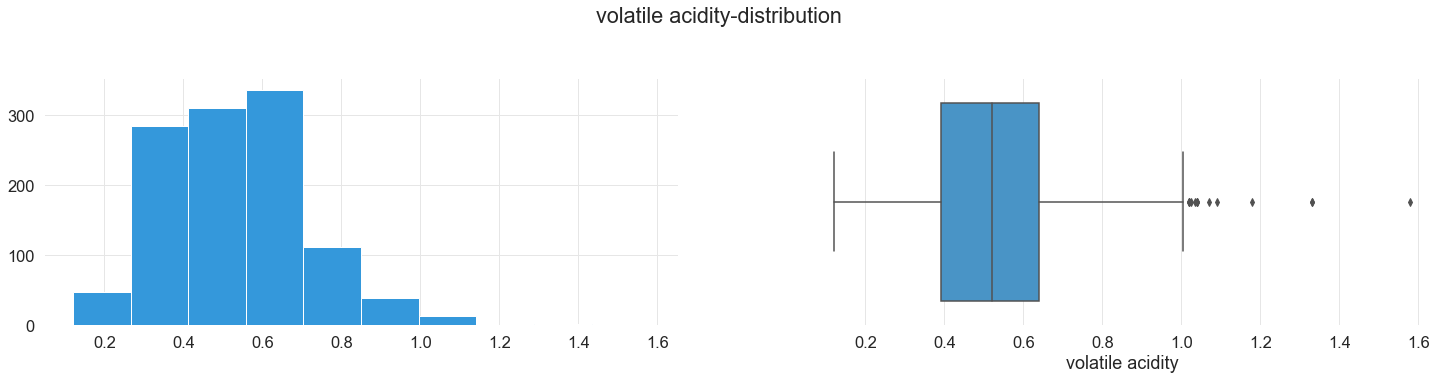

In [10]:
analyze_continuous_feature(df['volatile acidity'])

## 3. citric acid

Sample data:
 0    0.00
1    0.00
2    0.04
3    0.56
4    0.00
Name: citric acid, dtype: float64

Null value count :  0

 count    1143.000000
mean        0.268364
std         0.196686
min         0.000000
25%         0.090000
50%         0.250000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

 Skewness : 0.3715607833706083 



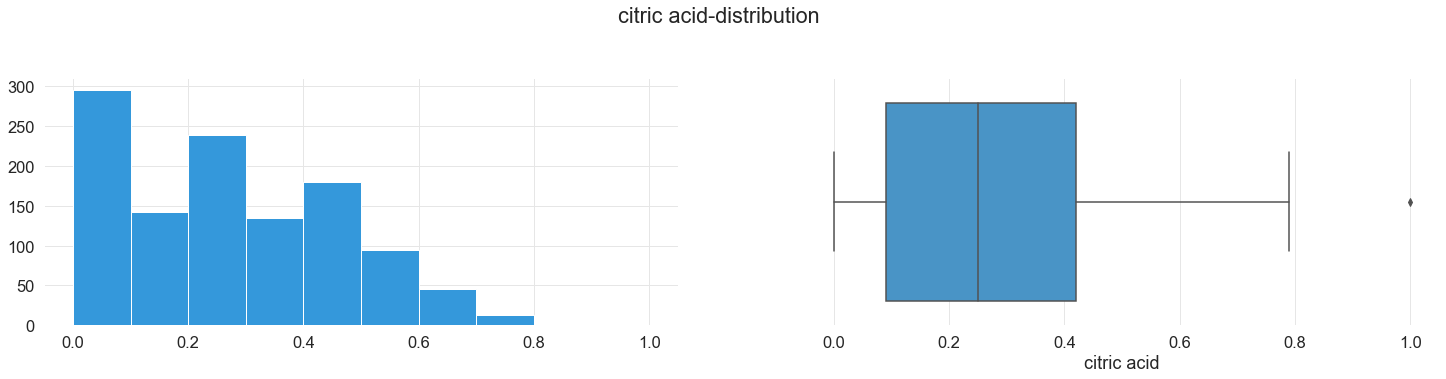

In [11]:
analyze_continuous_feature(df['citric acid'])

## 4. residual sugar

Sample data:
 0    1.9
1    2.6
2    2.3
3    1.9
4    1.9
Name: residual sugar, dtype: float64

Null value count :  0

 count    1143.000000
mean        2.532152
std         1.355917
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

 Skewness : 4.361096404323471 



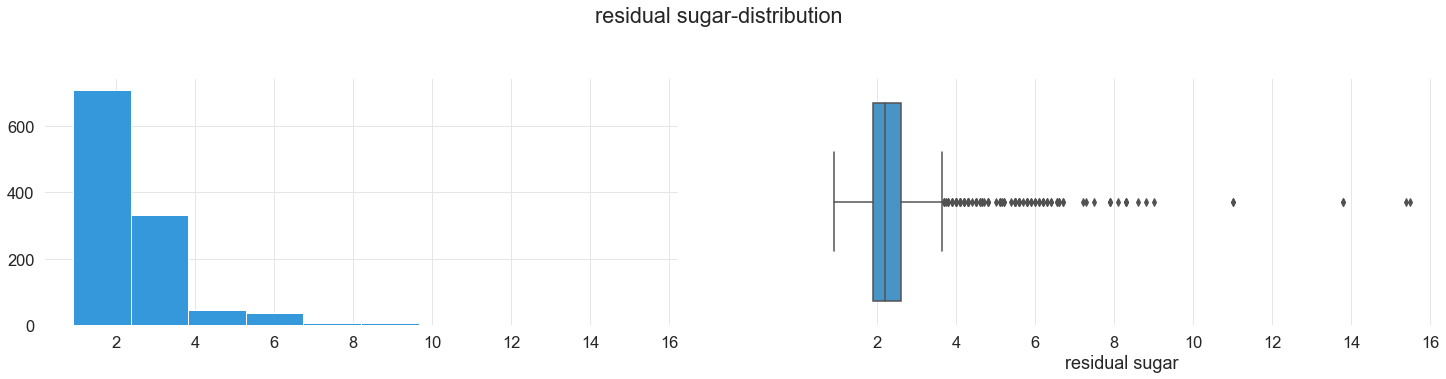

In [12]:
analyze_continuous_feature (df['residual sugar'])

## 5. Chlorides

Sample data:
 0    0.076
1    0.098
2    0.092
3    0.075
4    0.076
Name: chlorides, dtype: float64

Null value count :  0

 count    1143.000000
mean        0.086933
std         0.047267
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

 Skewness : 6.026360154399586 



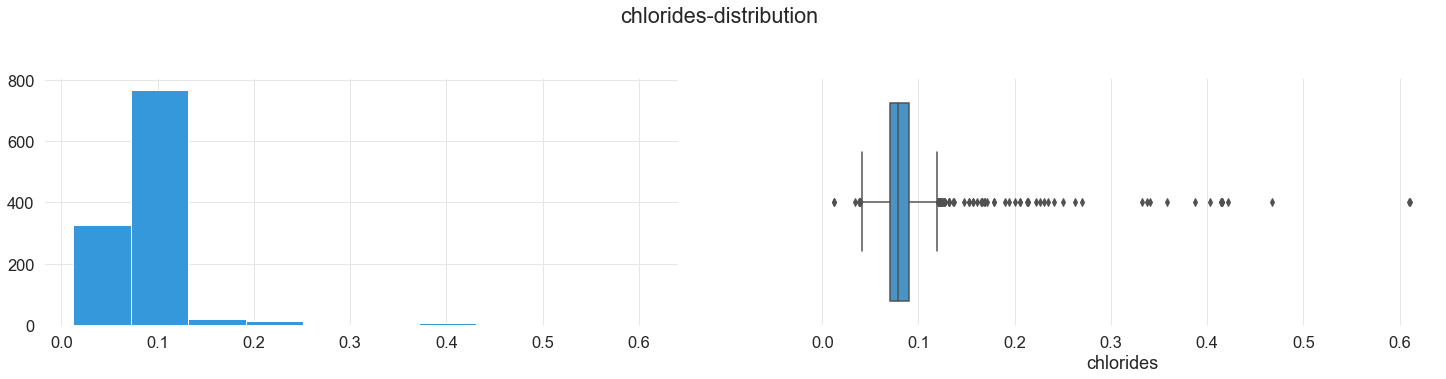

In [13]:
analyze_continuous_feature(df['chlorides'])

## 6. free sulphir dioxide

Sample data:
 0    11.0
1    25.0
2    15.0
3    17.0
4    11.0
Name: free sulfur dioxide, dtype: float64

Null value count :  0

 count    1143.000000
mean       15.615486
std        10.250486
min         1.000000
25%         7.000000
50%        13.000000
75%        21.000000
max        68.000000
Name: free sulfur dioxide, dtype: float64

 Skewness : 1.2312611567075427 



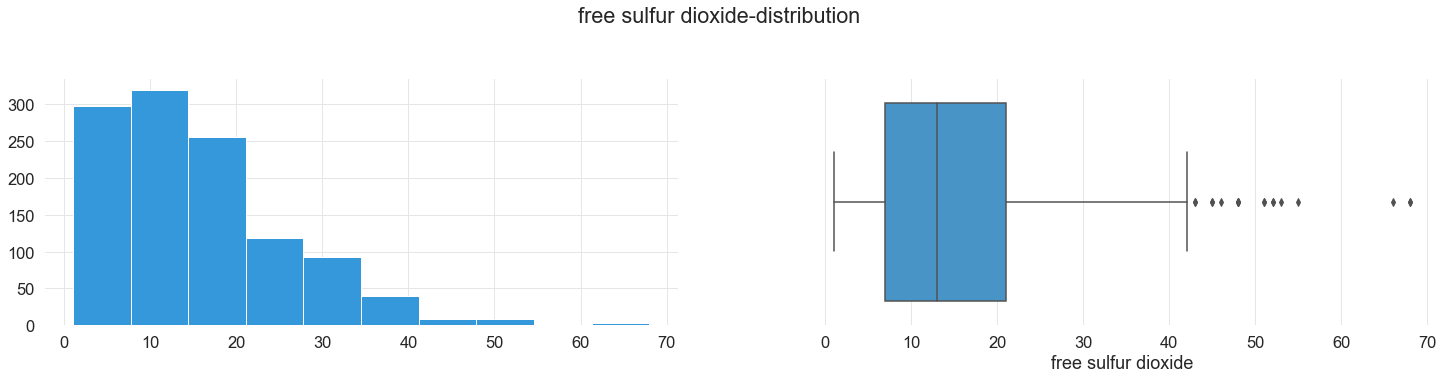

In [14]:
analyze_continuous_feature(df['free sulfur dioxide'])

## 7. total sulphur dioxide

Sample data:
 0    34.0
1    67.0
2    54.0
3    60.0
4    34.0
Name: total sulfur dioxide, dtype: float64

Null value count :  0

 count    1143.000000
mean       45.914698
std        32.782130
min         6.000000
25%        21.000000
50%        37.000000
75%        61.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

 Skewness : 1.6657660141342994 



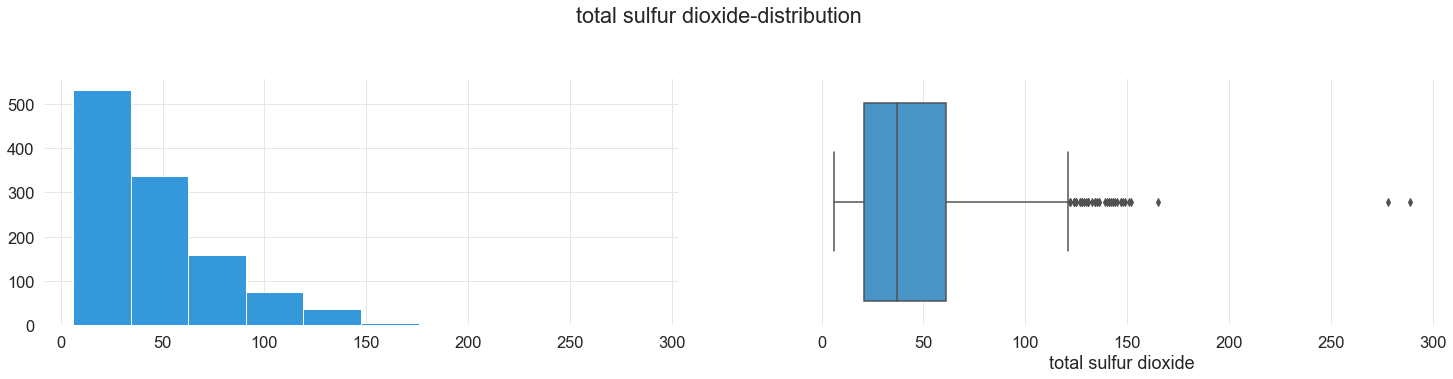

In [15]:
analyze_continuous_feature (df['total sulfur dioxide'])

## 8. density


Sample data:
 0    0.9978
1    0.9968
2    0.9970
3    0.9980
4    0.9978
Name: density, dtype: float64

Null value count :  0

 count    1143.000000
mean        0.996730
std         0.001925
min         0.990070
25%         0.995570
50%         0.996680
75%         0.997845
max         1.003690
Name: density, dtype: float64

 Skewness : 0.102395108720599 



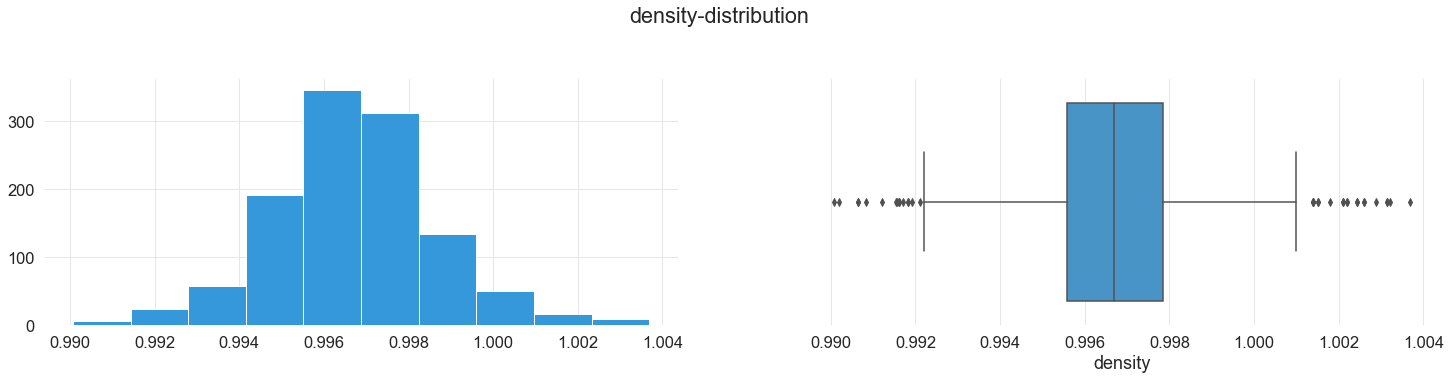

In [16]:
analyze_continuous_feature(df['density'])

## 9. p h

Sample data:
 0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

Null value count :  0

 count    1143.000000
mean        3.311015
std         0.156664
min         2.740000
25%         3.205000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

 Skewness : 0.22113839209685748 



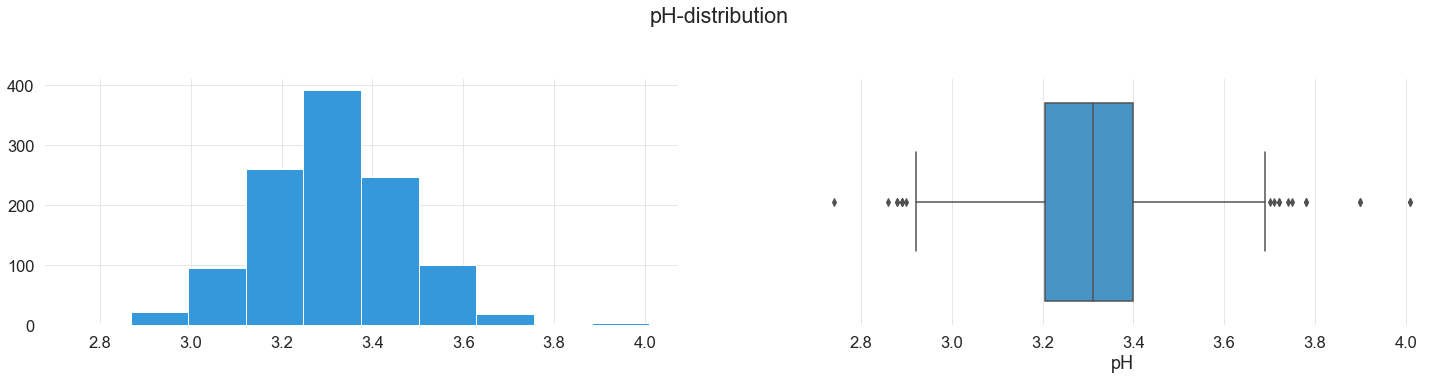

In [17]:
analyze_continuous_feature(df['pH'])

## 10. sulphates

Sample data:
 0    0.56
1    0.68
2    0.65
3    0.58
4    0.56
Name: sulphates, dtype: float64

Null value count :  0

 count    1143.000000
mean        0.657708
std         0.170399
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

 Skewness : 2.497266051332364 



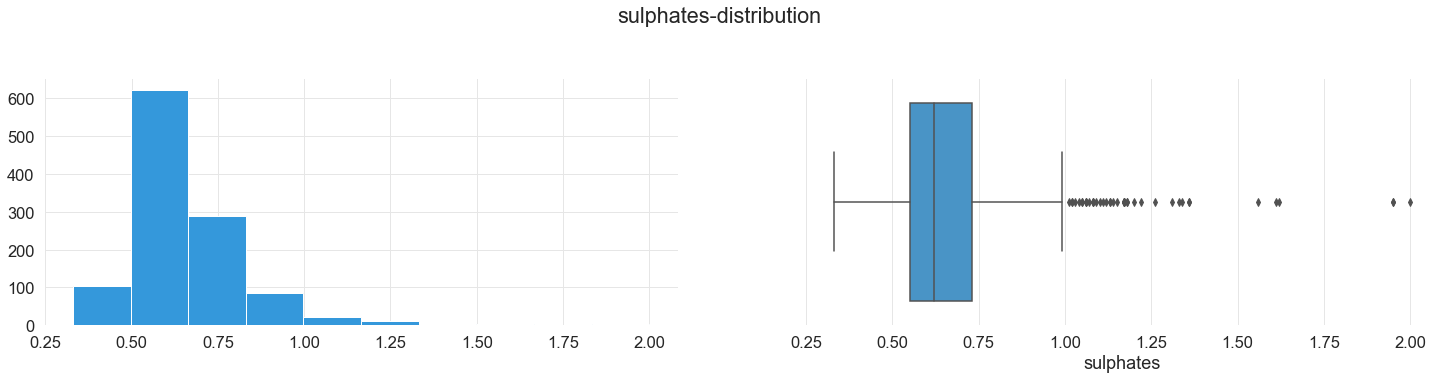

In [18]:
analyze_continuous_feature(df['sulphates'])

## 11. alcohol

Sample data:
 0    9.4
1    9.8
2    9.8
3    9.8
4    9.4
Name: alcohol, dtype: float64

Null value count :  0

 count    1143.000000
mean       10.442111
std         1.082196
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

 Skewness : 0.8633132317223615 



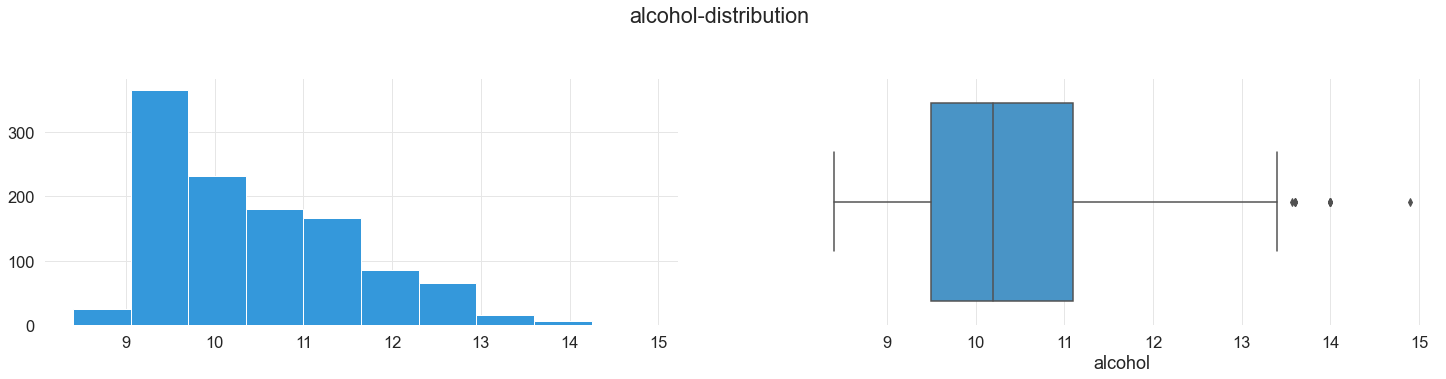

In [19]:
analyze_continuous_feature(df['alcohol'])

## 12. quality

Sample data:



0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64


Null value count :  0

Unique values:  [5, 6, 7, 4, 8, 3]

 Unique values count:  6

Value counts:
    Value  Count
0      5    483
1      6    462
2      7    143
3      4     33
4      8     16
5      3      6


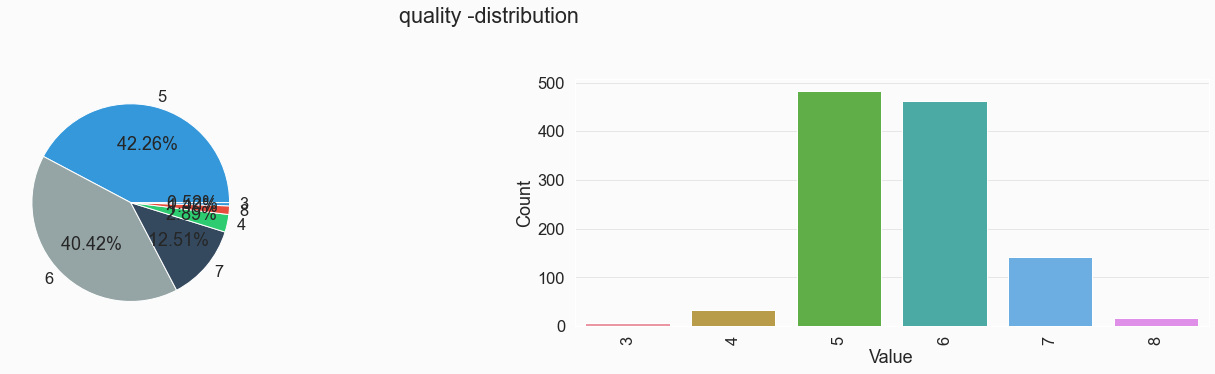

In [20]:
analyze_categorical_feature(df['quality'])

Most of the wines in the dataset are of quality 5 or 6.

<h3>
    Quality is the target variable. <br>
    Since the target variable is categorical is in nature, this is mainly a Classification problem.
</h3>

## 13. id

In [21]:
df['Id'].head(5)

0    0
1    1
2    2
3    3
4    4
Name: Id, dtype: int64

# Feature relations (if any)

<b>
1. Does Alcohol content affects the quality of wine ? <br>
If I increase the alcohol content, does wine quality increase?
</b>

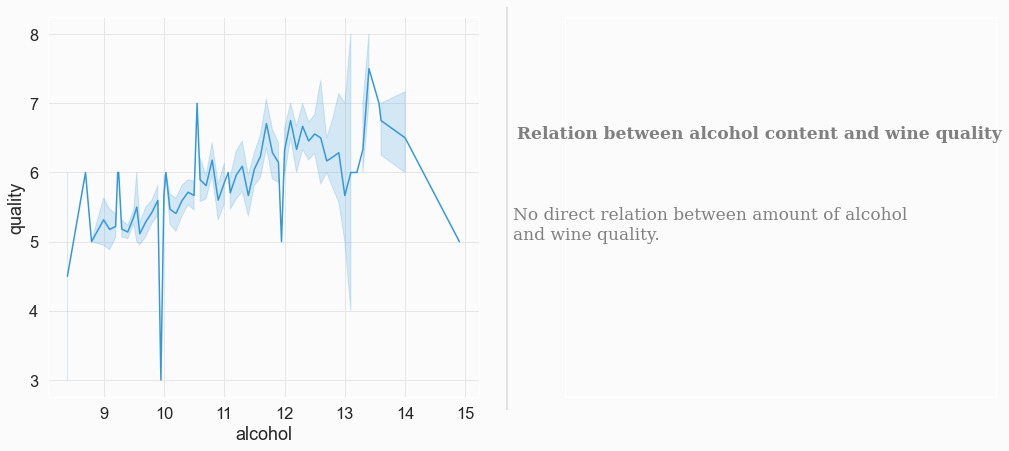

In [22]:
#Visualization
fig=plt.figure(figsize=(17,7));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

#Plot the countplot
sns.lineplot(data=df, x="alcohol", y="quality", ax=ax0)

#Draw line in the middle    
l1= lines.Line2D([0.5,0.5],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.47,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Relation between alcohol content and wine quality
        ''')
#text content
fig.text(x=0.47,
        y=0.4,
        fontweight='light',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        No direct relation between amount of alcohol
        and wine quality.
        '''        )
plt.show()

<b> 2. Correlation between input features and target feature (quality) </b>

In [23]:
# Find correlation of features with target feature 'quality' and convert to a data_frame
correlation_for_quality=df.corr()["quality"].to_frame()

In [24]:
# Sort the data frame by values
correlation_for_quality=correlation_for_quality.sort_values(by="quality", ascending=False)

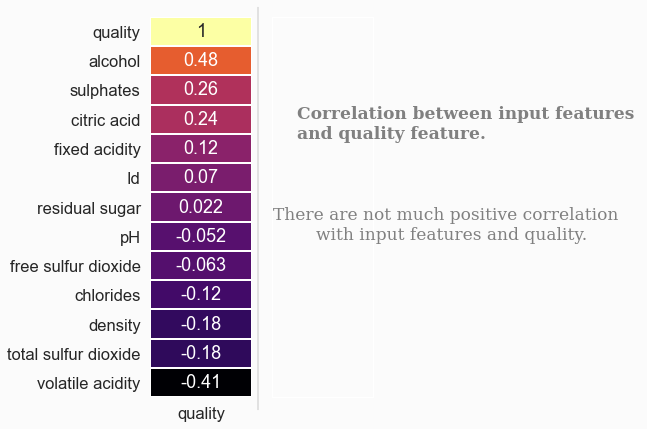

In [25]:
#Visualization
fig=plt.figure(figsize=(4,7));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

#Plot
sns.heatmap(correlation_for_quality, annot=True, cmap='inferno',cbar=False, ax=ax0,linewidths=1)

#Draw line in the middle    
l1= lines.Line2D([0.5,0.5],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.47,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Correlation between input features 
        and quality feature.
        ''')
#text content
fig.text(x=0.55,
        y=0.4,
        fontweight='light',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''There are not much positive correlation 
        with input features and quality.
        '''        )
plt.show()

<b> 3. Average of all features per quality</b>

In [26]:
df_avg_features=df.drop(columns='Id').groupby('quality').mean()

In [27]:
display(df_avg_features)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


In [28]:
sns.set_default=True

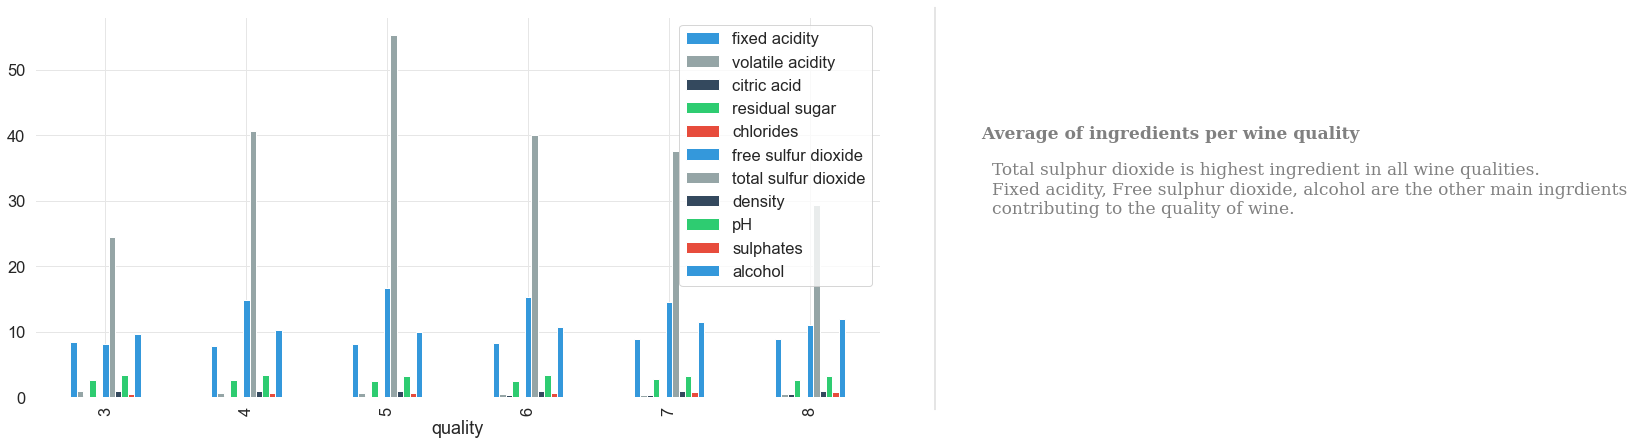

In [29]:
fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios':[15,3]}, figsize=(20,7))

ax[0].grid(False)
ax[0].set_xticklabels([])
#ax[0].set_yticklabels([])

ax[1].grid(False)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
df_avg_features.plot(kind='bar',  ax=ax[0]);

#Draw line in the middle    
l1= lines.Line2D([0.75,0.75],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.75,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Average of ingredients per wine quality
        ''')
#text content
fig.text(x=0.76,
        y=0.45,
        fontweight='light',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Total sulphur dioxide is highest ingredient in all wine qualities.
        Fixed acidity, Free sulphur dioxide, alcohol are the other main ingrdients
        contributing to the quality of wine.
        ''')

fig.show()

# Model training

In [30]:
df_data= df.copy()

In [31]:
df_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [32]:
# removing id feature
df_data.drop(columns=["Id"],axis=1, inplace = True)

In [33]:
x = df_data.drop(['quality'], axis=1)
y = df_data.quality

In [34]:
print ("Train test splitting")
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.3, random_state=1)

Train test splitting


In [35]:
print (f"x train shape : {x_train.shape}  y train shape : {y_train.shape} \nx_test shape  : {x_test.shape} y_test.shape  : {y_test.shape} ")

x train shape : (800, 11)  y train shape : (800,) 
x_test shape  : (343, 11) y_test.shape  : (343,) 


In [36]:
df_model_results = pd.DataFrame(columns=['id','ModelName', 'Avg Score'])
model_list=[]
id=0

def store_model_results (model,model_name, score):
    global df_model_results 
    global id
    global model_list
    model_list.append(model)
    row_loc = df_model_results.shape[0] + 1
    id+=1
    df_model_results.loc[row_loc, ['id','ModelName','Avg Score']]=[id,model_name, score]

In [37]:
# Empty the dataframe
df_model_results = df_model_results.iloc[0:0]

#Execute each model and store the results
for model in [LogisticRegression(),
             SVC(),
             XGBClassifier(),
             RandomForestClassifier(),
             DecisionTreeClassifier(),
             KNeighborsClassifier()]:
    store_model_results(model,model.__class__.__name__,
                       cross_val_score(model,x_train,y_train).mean())
    
#Sort the values based on score
df_model_results.sort_values('Avg Score', ascending=False, inplace=True)
#print model scores
display (df_model_results)
display(HTML('<h3>' + f"{df_model_results.head(1)['ModelName'].tolist()[0]} having highest average score" + '</h3>'))


[00:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:40:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

,id,ModelName,Avg Score
4,4,RandomForestClassifier,0.645
3,3,XGBClassifier,0.625
1,1,LogisticRegression,0.57625
5,5,DecisionTreeClassifier,0.52625
6,6,KNeighborsClassifier,0.49
2,2,SVC,0.485


In [38]:
#Fetch the selected model id
selected_model_id = df_model_results.head(1)['id'].tolist()[0] - 1

# Fetch the selected model
selected_model = model_list[selected_model_id]

In [39]:
print (f'Fitting {selected_model.__class__.__name__}')

selected_model.fit(x_train, y_train);

Fitting RandomForestClassifier


In [40]:
print ("Predicting the target feature")
y_pred = selected_model.predict(x_test)

Predicting the target feature


In [41]:
print ("Confusion matrix")
confusion_matrix (y_test, y_pred,labels=[4,5,6,7,8])

Confusion matrix


array([[  0,   4,   1,   0,   0],
       [  0, 109,  30,   1,   0],
       [  0,  45,  96,   8,   0],
       [  0,   3,  13,  25,   0],
       [  0,   0,   3,   4,   1]], dtype=int64)

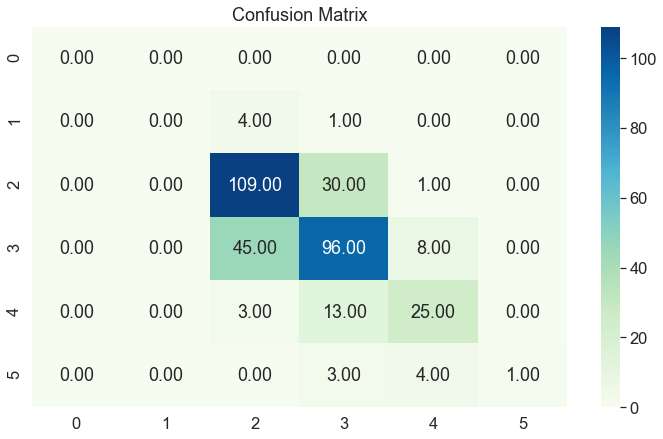

In [42]:
plt.figure(figsize=(12, 7))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=[3,4,5,6,7,8]), annot=True, cmap='GnBu', fmt="0.2f")
plt.title("Confusion Matrix");

In [43]:
print ("Classification report: \n", classification_report(y_true=y_test, y_pred=y_pred))

Classification report: 
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.68      0.78      0.72       140
           6       0.67      0.64      0.66       149
           7       0.66      0.61      0.63        41
           8       1.00      0.12      0.22         8

    accuracy                           0.67       343
   macro avg       0.60      0.43      0.45       343
weighted avg       0.67      0.67      0.66       343



Precision tp/(tp+`fp) : measures the ability of a classifier to identify only the correct instances for each class. <br>
Recall tp/(tp+fn) : is the ability of the classifier to find all correct instances per class. <br>
F1 Score = 2 * (precision * recall)/ (precision + recall) <br>
F1 score is considered a better indicator of the classifier's performance than the regular accuracy measure.<br>
Support is the number of actual occurances of the class in the test data set.

In [44]:
df_dummy = pd.DataFrame()
df_dummy['test'] = pd.Series(y_test.values)
df_dummy['pred'] = pd.Series(y_pred)

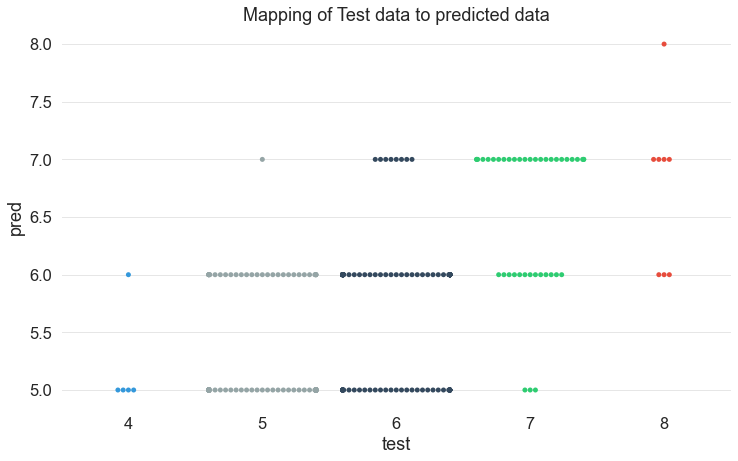

In [45]:
sns.swarmplot(data=df_dummy, x='test', y='pred');
plt.title('Mapping of Test data to predicted data');